# Gráficos ICE y PDP
### Evaluación de rendimiento en ML

Cargamos librerias

In [12]:
# Configuración warnings
# ==============================================================================
import warnings
warnings.filterwarnings('ignore')

# Librerías
# ==============================================================================
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.inspection import plot_partial_dependence
from sklearn.inspection import partial_dependence
from time import time

Cargamos dataset

In [7]:
# Datos
# ==============================================================================
cal_housing = fetch_california_housing()
X = pd.DataFrame(cal_housing.data, columns=cal_housing.feature_names)
y = cal_housing.target

y -= y.mean()

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.1, random_state=0
)
X.head(5)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25


Entrenamos un modelo de random forest

In [8]:
# Modelo
# ==============================================================================

modelo = RandomForestRegressor(n_estimators=500, max_depth=4) # Hiperparametros
modelo.fit(
    X_train,
    y_train
)

RandomForestRegressor(max_depth=4, n_estimators=500)

Trazaremos la dependencia parcial, tanto individual (ICE)como promediada (PDP). Nos limitamos a solo 50 curvas ICE

Computando partial dependence plots...
done in 29.952s


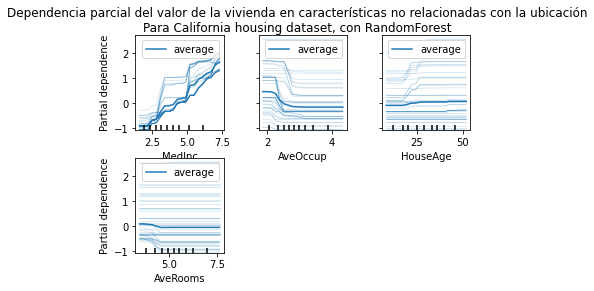

In [9]:
# Generar curvas ICE y PDP independientes
# =================================================================
print('Computando partial dependence plots...')
tic = time()
features =  ['MedInc', 'AveOccup', 'HouseAge', 'AveRooms']
display = plot_partial_dependence(
    modelo, X_train, features, kind="both", subsample=50,
    n_jobs=3, grid_resolution=20, random_state=0
)
print(f"terminado en {time() - tic:.3f}s")
display.figure_.suptitle(
    'Dependencia parcial del valor de la vivienda en características no relacionadas con la ubicación\n'
    'Para California housing dataset, con RandomForest'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

Gráficos de interacción 2D

Computando partial dependence plots...
terminado en 2.485s


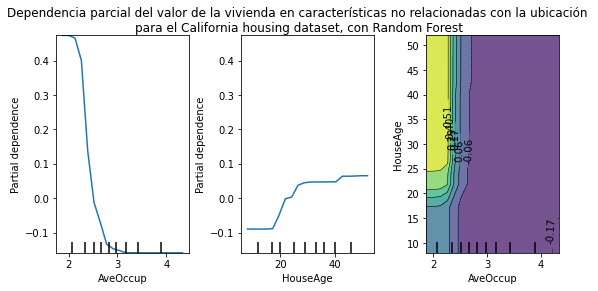

In [10]:
features = ['AveOccup', 'HouseAge', ('AveOccup', 'HouseAge')]
print('Computando partial dependence plots...')
tic = time()
_, ax = plt.subplots(ncols=3, figsize=(9, 4))
display = plot_partial_dependence(
    modelo, X_train, features, kind='average', n_jobs=3, grid_resolution=20,
    ax=ax,
)
print(f"terminado en {time() - tic:.3f}s")
display.figure_.suptitle(
    'Dependencia parcial del valor de la vivienda en características no relacionadas con la ubicación \n'
    'para el California housing dataset, con Random Forest'
)
display.figure_.subplots_adjust(wspace=0.4, hspace=0.3)

Gráficos de interacción 3D

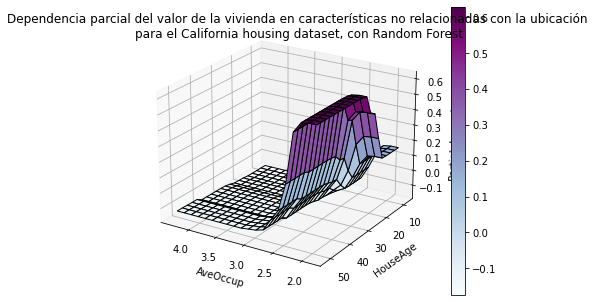

In [13]:
fig = plt.figure()

features = ('AveOccup', 'HouseAge')
pdp = partial_dependence(
    modelo, X_train, features=features, kind='average', grid_resolution=20
)
XX, YY = np.meshgrid(pdp["values"][0], pdp["values"][1])
Z = pdp.average[0].T
ax = Axes3D(fig)
surf = ax.plot_surface(XX, YY, Z, rstride=1, cstride=1,
                       cmap=plt.cm.BuPu, edgecolor='k')
ax.set_xlabel(features[0])
ax.set_ylabel(features[1])
ax.set_zlabel('Partial dependence')
# bonita vista de inicio
ax.view_init(elev=22, azim=122)
plt.colorbar(surf)
plt.suptitle(
    'Dependencia parcial del valor de la vivienda en características no relacionadas con la ubicación \n'
    'para el California housing dataset, con Random Forest')
plt.subplots_adjust(top=0.9)
plt.show()